In [9]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [11]:
# Numerical libraries
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

In [12]:
# reading the CSV file into pandas dataframe
mpg_df = pd.read_csv("car-mpg.csv")  

In [13]:
# Check top few records to get a feel of the data structure
mpg_df.head(50)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,0,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,0,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,0,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,0,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,0,amc ambassador dpl


In [14]:
# drop the car name column as it is useless for the model
mpg_df = mpg_df.drop('car_name', axis=1)

In [15]:
# Replace the numbers in categorical variables with the actual country names in the origin col
mpg_df['origin'] = mpg_df['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})

In [16]:
# Convert categorical variable into dummy/indicator variables. As many columns will be created as distinct values
# This is also kown as one hot coding. The column names will be America, Europe and Asia... with one hot coding
mpg_df = pd.get_dummies(mpg_df, columns=['origin'])

In [17]:
# Note:  HP column is missing the describe output. That indicates something is not right with that column

In [18]:
mpg_df

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,0,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,0,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,0,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,0,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,0,1,0,0
5,15.0,8,429.0,198,4341,10.0,70,0,1,0,0
6,14.0,8,454.0,220,4354,9.0,70,0,1,0,0
7,14.0,8,440.0,215,4312,8.5,70,0,1,0,0
8,14.0,8,455.0,225,4425,10.0,70,0,1,0,0
9,15.0,8,390.0,190,3850,8.5,70,0,1,0,0


In [19]:
#Check if the hp column contains anything other than digits 
# run the "isdigit() check on 'hp' column of the mpg_df dataframe. Result will be True or False for every row
# capture the result in temp dataframe and dow a frequency count using value_counts()
# There are six records with non digit values in 'hp' column
temp = pd.DataFrame(mpg_df.hp.str.isdigit())  # if the string is made of digits store True else False  in the hp column 
# in temp dataframe

temp[temp['hp'] == False]   # from temp take only those rows where hp has false


,hp
32,False
126,False
330,False
336,False
354,False
374,False


In [20]:
# On inspecting records number 32, 126 etc, we find "?" in the columns. Replace them with "nan"
#Replace them with nan and remove the records from the data frame that have "nan"
mpg_df = mpg_df.replace('?', np.nan)

In [21]:
#Let us see if we can get those records with nan

mpg_df[mpg_df.isnull().any(axis=1)]

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,NaN,2046,19.0,71,1,1,0,0
126,21.0,6,200.0,NaN,2875,17.0,74,0,1,0,0
330,40.9,4,85.0,NaN,1835,17.3,80,1,0,0,1
336,23.6,4,140.0,NaN,2905,14.3,80,1,1,0,0
354,34.5,4,100.0,NaN,2320,15.8,81,1,0,0,1
374,23.0,4,151.0,NaN,3035,20.5,82,1,1,0,0


In [22]:
# There are various ways to handle missing values. Drop the rows, replace missing values with median values etc. 

In [23]:
#of the 398 rows 6 have NAN in the hp column. We will drop those 6 rows. Not a good idea under all situations
#note: HP is missing becauses of the non-numeric values in the column. 
#mpg_df = mpg_df.dropna()

In [24]:
#instead of dropping the rows, lets replace the missing values with median value. 
mpg_df.median()

mpg                 23.0
cyl                  4.0
disp               148.5
hp                  93.5
wt                2803.5
acc                 15.5
yr                  76.0
car_type             1.0
origin_america       1.0
origin_asia          0.0
origin_europe        0.0
dtype: float64

In [25]:
# replace the missing values in 'hp' with median value of 'hp' :Note, we do not need to specify the column names
# every column's missing value is replaced with that column's median respectively  (axis =0 means columnwise)
#mpg_df = mpg_df.fillna(mpg_df.median())

mpg_df = mpg_df.apply(lambda x: x.fillna(x.median()),axis=0)


In [26]:
mpg_df.dtypes

mpg               float64
cyl                 int64
disp              float64
hp                 object
wt                  int64
acc               float64
yr                  int64
car_type            int64
origin_america      int64
origin_asia         int64
origin_europe       int64
dtype: object

In [27]:
mpg_df['hp'] = mpg_df['hp'].astype('float64')  # converting the hp column from object / string type to float


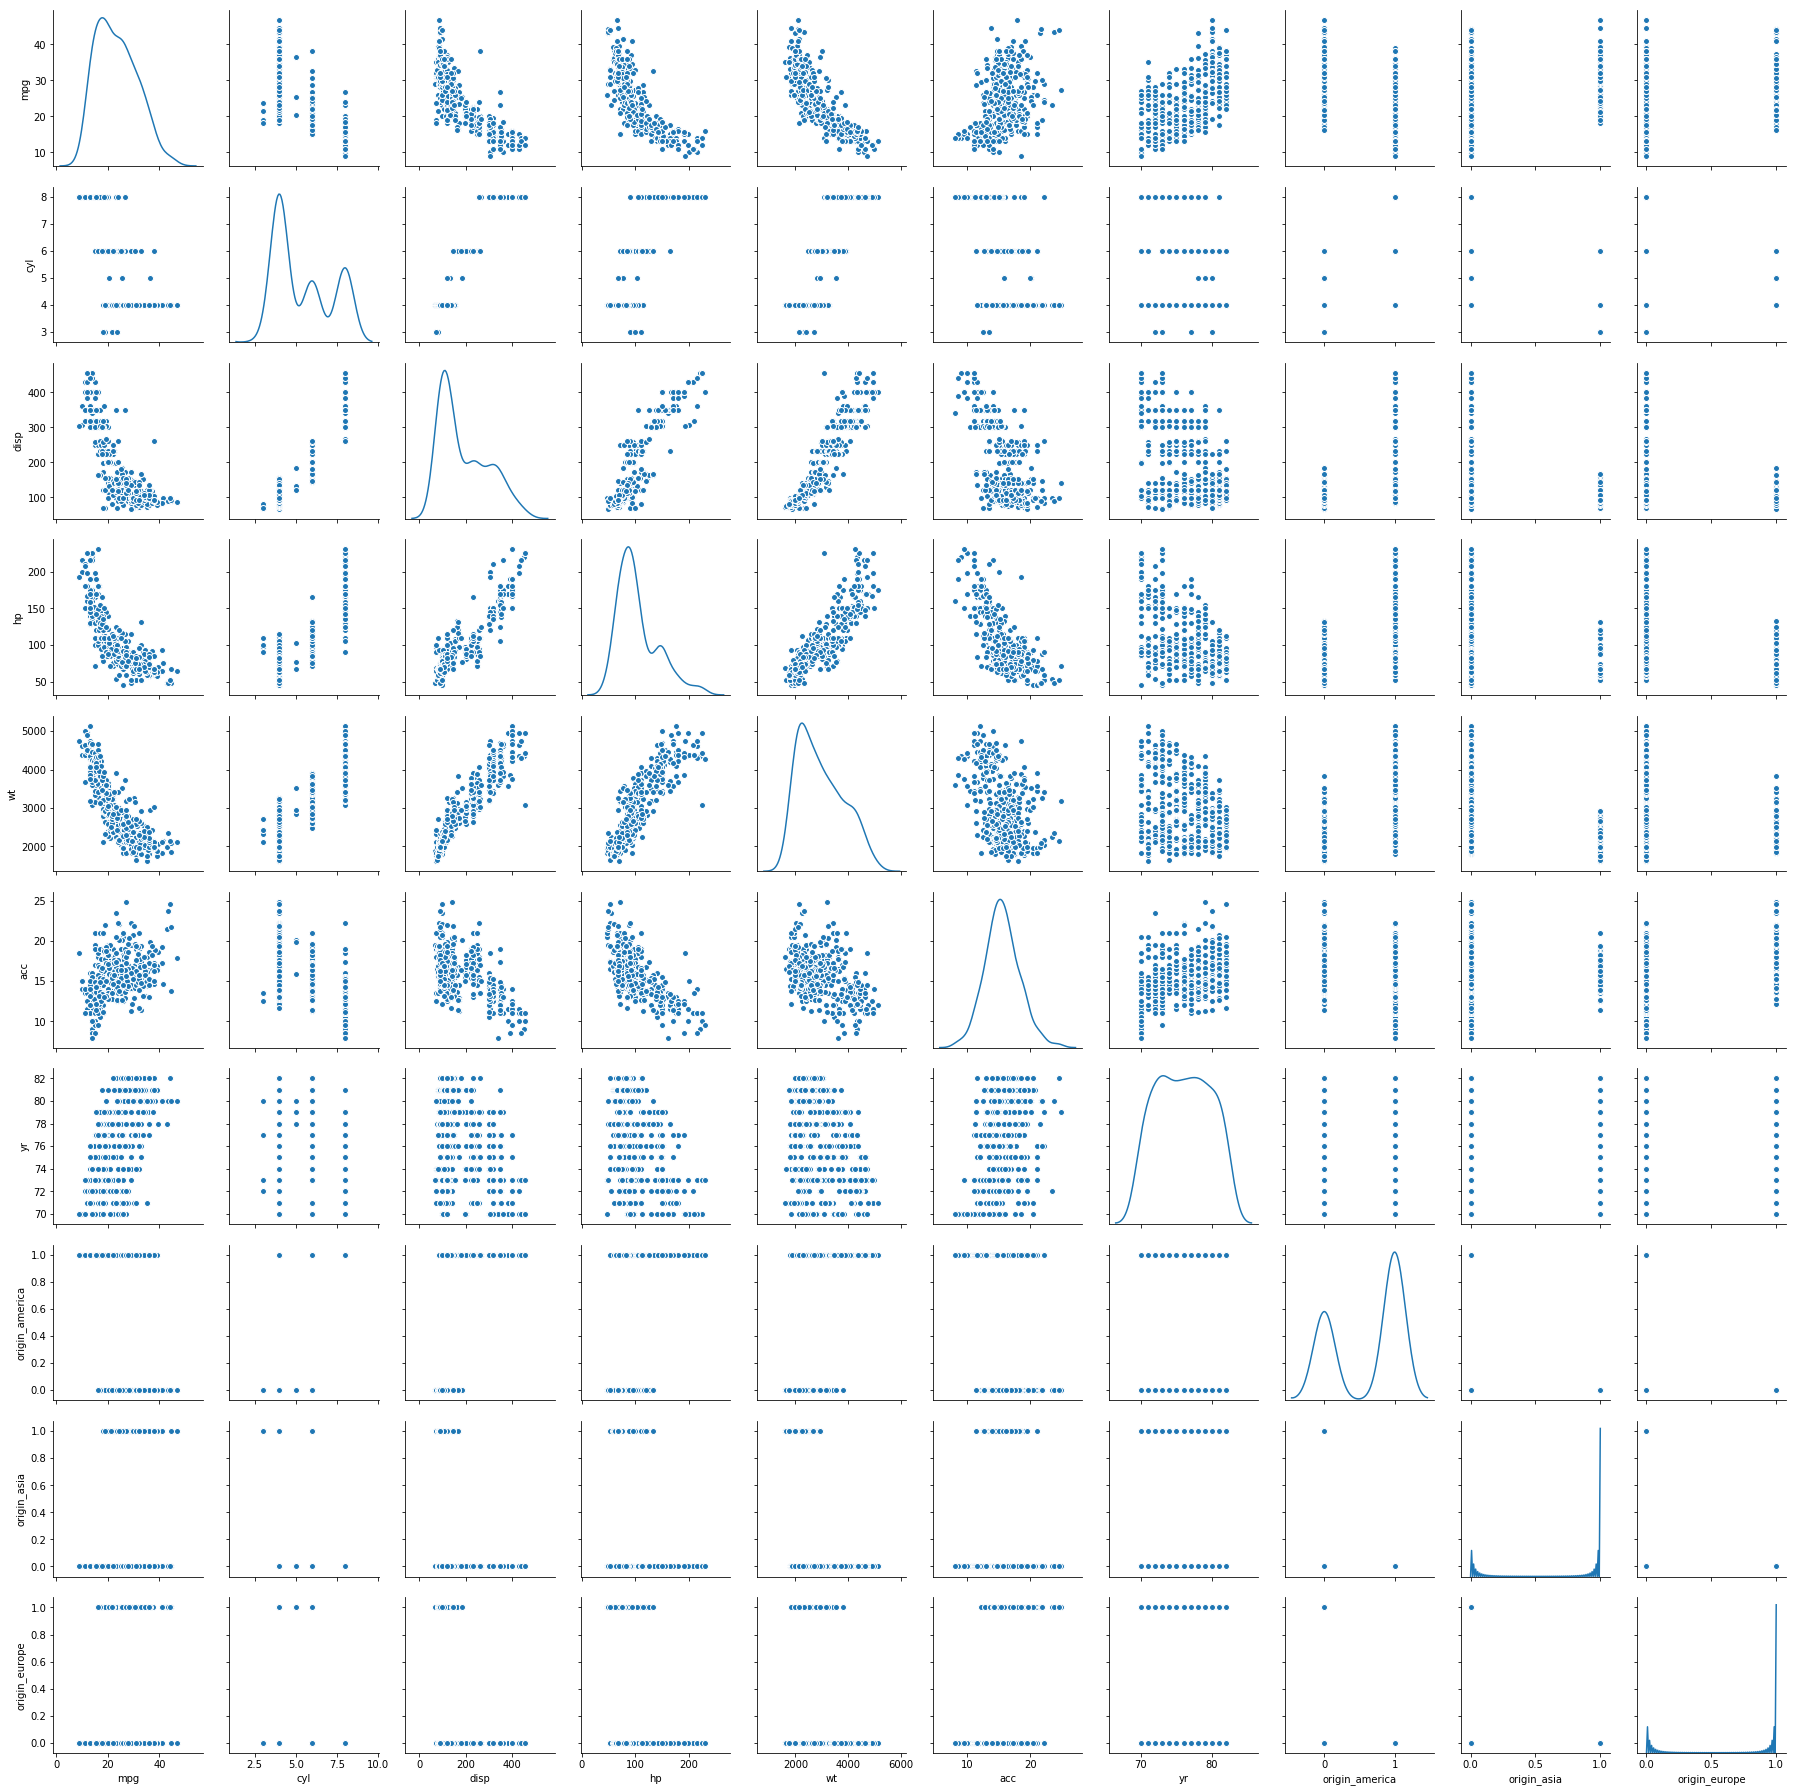

In [19]:
# Let us do a correlation analysis among the different dimensions and also each dimension with the dependent dimension
# This is done using scatter matrix function which creates a dashboard reflecting useful information about the dimensions
# The result can be stored as a .png file and opened in say, paint to get a larger view 

mpg_df_attr = mpg_df.iloc[:, 0:10]

#axes = pd.plotting.scatter_matrix(mpg_df_attr)
#plt.tight_layout()
#plt.savefig('d:\greatlakes\mpg_pairpanel.png')

sns.pairplot(mpg_df_attr, diag_kind='kde')   # to plot density curve instead of histogram

#sns.pairplot(mpg_df_attr)  # to plot histogram, the default

In [20]:
#The data distribution across various dimensions except 'Acc' do not look normal
#Close observation between 'mpg' and other attributes indicate the relationship is not really linear
#relation between 'mpg' and 'hp' show hetroscedacity... which will impact model accuracy
#How about 'mpg' vs 'yr' surprising to see a positive relation

In [28]:
# To scale the dimensions we need scale function which is part of sckikit preprocessing libraries

from sklearn import preprocessing

# scale all the columns of the mpg_df. This will produce a numpy array
mpg_df_scaled = preprocessing.scale(mpg_df)

In [29]:
mpg_df_scaled

array([[-0.7064387 ,  1.49819126,  1.0906037 , ...,  0.77355903,
        -0.49764335, -0.46196822],
       [-1.09075062,  1.49819126,  1.5035143 , ...,  0.77355903,
        -0.49764335, -0.46196822],
       [-0.7064387 ,  1.49819126,  1.19623199, ...,  0.77355903,
        -0.49764335, -0.46196822],
       ...,
       [ 1.08701694, -0.85632057, -0.56103873, ...,  0.77355903,
        -0.49764335, -0.46196822],
       [ 0.57460104, -0.85632057, -0.70507731, ...,  0.77355903,
        -0.49764335, -0.46196822],
       [ 0.95891297, -0.85632057, -0.71467988, ...,  0.77355903,
        -0.49764335, -0.46196822]])

In [30]:
#convert the numpy array back into a dataframe 

mpg_df_scaled = pd.DataFrame(mpg_df_scaled, columns=mpg_df.columns)

In [31]:
# Since "mpg" and "Acc" seem to have very weak correlation. Let us drop "ACC" from the model 
# Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
X = mpg_df_scaled.drop('mpg', axis=1)
X = X.drop('acc', axis=1)
X = X.drop('origin_america', axis=1)
X = X.drop('origin_asia', axis=1)
X = X.drop('origin_europe', axis=1)
#X = X.drop('yr', axis=1)


y = mpg_df[['mpg']]

In [32]:
# Split X and y into training and test set in 75:25 ratio

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [34]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()

regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [38]:
# Let us check the sum of squared errors by predicting value of y for test cases and 
# subtracting from the actual y for the test cases

mse = np.mean((regression_model.predict(X_test)-y_test)**2)

In [39]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

math.sqrt(mse)

2.863673840253556

In [40]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_train, y_train)

0.8240112186045527

In [41]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_test, y_test)

0.8502963865655867

In [31]:
#---------------------------------------Iteration 2  (complex polynomial attributes) -------------------------------------------

In [42]:
from sklearn.preprocessing import PolynomialFeatures 
poly = PolynomialFeatures( degree = 2, include_bias = False) 
XPoly_train = poly.fit_transform(X_train)

regression_model = LinearRegression().fit(XPoly_train, y_train)
print(XPoly_train.shape)
print(X_train.shape)

(298, 27)
(298, 6)


In [ ]:
# Note how the polynomial features function has increased the dimensions from 5 to 20! 

In [39]:
for i in range(1,20):  #power of 1 is already there
    print(XPoly_train[i])


[ 1.49819126  1.19623199  2.76875319  1.66896828 -1.62742629  2.24457705
  1.79218431  4.14812183  2.50043369 -2.43819584  1.43097098  3.31207115
  1.99647325 -1.9467794   7.66599423  4.62096126 -4.50594174  2.78545513
 -2.71612286  2.64851634]
[ 1.49819126  1.19623199  1.19702651  0.9536499  -0.81507387  2.24457705
  1.79218431  1.79337466  1.42874995 -1.22113655  1.43097098  1.43192141
  1.14078652 -0.97501744  1.43287247  1.14154422 -0.97566503  0.90944814
 -0.77729512  0.66434541]
[-0.85632057 -1.00275705 -1.16056351 -1.18521117  1.08041511  0.73328492
  0.85868149  0.9938144   1.0149207  -0.92518169  1.0055217   1.16376324
  1.18847886 -1.08339387  1.34690765  1.37551283 -1.25389035  1.40472551
 -1.28052006  1.16729682]
[ 1.49819126  1.0906037   0.67311762  1.33318246 -1.08585801  2.24457705
  1.63393293  1.00845893  1.99736231 -1.62682298  1.18941643  0.73410456
  1.45397373 -1.18424076  0.45308733  0.89738861 -0.73091016  1.77737548
 -1.44764686  1.17908762]
[1.49819126 0.639282

In [40]:
# Let us check the sum of squared errors by predicting value of y for test cases and 
# subtracting from the actual y for the test cases

mse = np.mean((regression_model.predict(XPoly_train)- y_train)**2)

In [41]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

math.sqrt(mse)

2.713355764176963

In [42]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(XPoly_train, y_train)

0.8831028861773409

In [43]:
# predict mileage (mpg) for a set of attributes not in the training or test set
XPoly_test = poly.fit_transform(X_test)


y_pred = regression_model.predict(XPoly_test)

regression_model.score(XPoly_test, y_test)

0.8435154490371752

In [ ]:
# Note that upto a point of complexity rise, both training and test errors come down but beyond a point, further complexity
# increases the test errors significantly indicating point of overfit.

In [ ]:
# with increasing dimensionality we inch towards curse of dimensionality and hence overfit. Use of LASSO along wih polynomial
# features will help improve perormance and at the same time make it generalizable.